In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np

In [2]:
gdf = gpd.read_file('..\\output\\distributed_data.GEOJSON', engine='pyogrio', use_arrow=True)
road_gdf = gpd.read_file('..\\output\\road_gdf.GEOJSON', engine='pyogrio', use_arrow=True)

<Axes: >

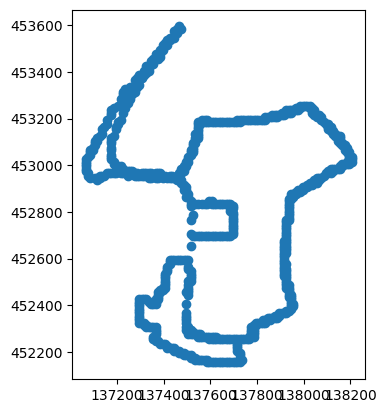

In [5]:
gdf = gdf.clip((136783.0826,451879.0786,138490.1231,453599.2073))
gdf[gdf['median_dBA_raw'].notna()].plot()

<Axes: >

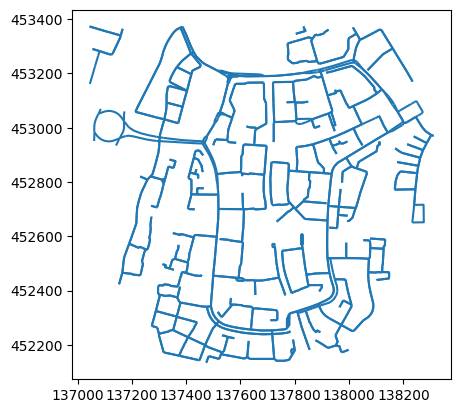

In [6]:
road_gdf = road_gdf.to_crs(gdf.crs)
road_gdf.plot()

<Axes: >

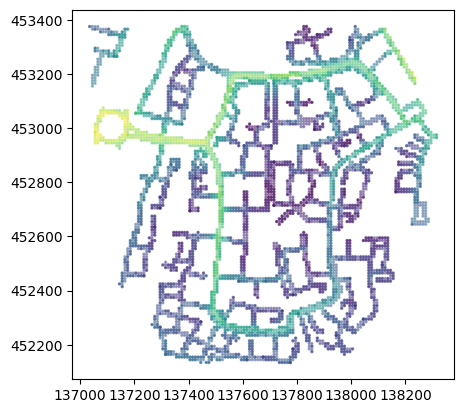

In [13]:
# merging
gdf.sjoin_nearest(road_gdf, max_distance=10).plot(alpha=0.4, markersize=2, column='dBA_rivm')

<Axes: >

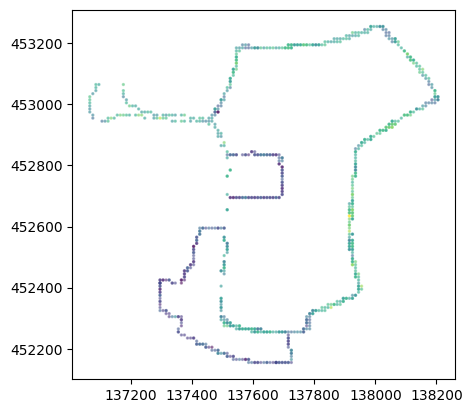

In [16]:
gdf.sjoin_nearest(road_gdf, max_distance=10).plot(alpha=0.4, markersize=2, column='median_dBA_reg_adj')

In [18]:
road_dba_gdf = gdf.sjoin_nearest(road_gdf, max_distance=10)

In [21]:
road_dba_gdf.to_file('..\\output\\road_dba_gdf.GEOJSON')